### Load MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# scikit-learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# common imports
import numpy as np

In [4]:
# import function to scikit-learn datasets
from sklearn.datasets import fetch_openml

# load specified dataset (MNIST)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# print type of dataset
type(mnist)

sklearn.utils.Bunch

In [5]:
X, y = mnist["data"], mnist["target"]

### Plot data

In [6]:
# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# convert string labels to int
y = y.astype(np.uint8)

In [8]:
# function to quickly plot an image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

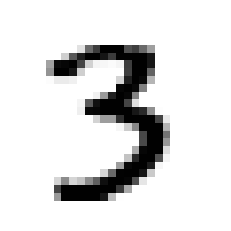

In [9]:
plot_digit(X[10000])

In [10]:
# function to quickly plot several digits
def plot_digits(instances, **options):
    size = 28
    images = [instance.reshape(size,size) for instance in instances]
    image = np.concatenate(images, axis=1)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

### Prepare data for machine learning

### Identify Train Set and Test Set

X_train: 56000, (56000, 784)
X_test: 14000, (14000, 784)
y_train: 56000, (56000,)
y_test: 14000, (14000,)


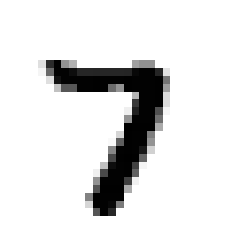

In [11]:
from sklearn.model_selection import train_test_split

k = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

print(f"X_train: {len(X_train)}, {X_train.shape}")
print(f"X_test: {len(X_test)}, {X_test.shape}")
print(f"y_train: {len(y_train)}, {y_train.shape}")
print(f"y_test: {len(y_test)}, {y_test.shape}")

plot_digit(X_test[10000])

## Train kNN classifier

In [12]:
%%time
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

CPU times: user 107 ms, sys: 3.58 ms, total: 111 ms
Wall time: 110 ms


KNeighborsClassifier(n_neighbors=3)

In [13]:
# take a test digit
td = 4000
test_digit = X_test[td]
print(y_test[td])

3


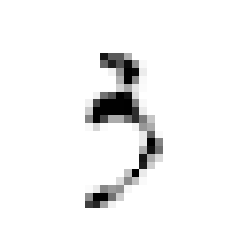

In [14]:
plot_digit(test_digit)

### Evaluation

In [15]:
%%time

# trainings accuracy
wrong_images = X_train[(classifier.predict(X_train)-y_train) != 0]
percentage = ((1-len(wrong_images)/len(X_train)) * 100)
print("Accuracy Train " + str(percentage))

Accuracy Train 98.57321428571429
CPU times: user 7min 43s, sys: 14min 20s, total: 22min 4s
Wall time: 51.7 s


In [16]:
%%time

# test accuracy
wrong_images = X_test[(classifier.predict(X_test)-y_test) != 0]
percentage = ((1-len(wrong_images)/len(X_test)) * 100)
print("Accuracy Test " + str(percentage))

Accuracy Test 97.14285714285714
CPU times: user 1min 54s, sys: 3min 39s, total: 5min 34s
Wall time: 13.2 s


Accuracy is strongly influenced by the distribution of the classes in the test data.

#### Cross Validation
[Find more information on cross validation here.](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [17]:
%%time

# cross validation score
from sklearn.model_selection import cross_val_score

print(cross_val_score(classifier, X_train, y_train, cv=3, scoring="accuracy"))

[0.96866127 0.9686077  0.9694632 ]
CPU times: user 4min 38s, sys: 10min, total: 14min 38s
Wall time: 33.7 s


In [18]:
%%time

# prediction of classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
print(y_train_pred)

[5 8 0 ... 9 3 7]
CPU times: user 5min 52s, sys: 11min 7s, total: 17min
Wall time: 41.3 s


#### Accuracy

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.970375

#### Precision

In [20]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred, average='weighted')

0.9705500243024229

#### Recall

In [21]:
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred, average='weighted')

0.970375

#### F1 Score

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='weighted')

0.9703221334372104

#### Confusion Matrix

In [23]:
# confusing matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))

[[5464    4    3    0    0    7   16    2    0    3]
 [   1 6252    9    2    3    1    4   10    2    3]
 [  35   49 5396   14    5    4   11   67   11    3]
 [   5   15   36 5475    2   67    3   30   30   16]
 [   4   45    4    1 5260    0   13    9    2  112]
 [  17    9    4   60   10 4887   46    5    9   21]
 [  23   17    1    0    5   14 5480    0    2    0]
 [   3   67   16    0   12    1    0 5691    1   55]
 [  20   69   28   85   27   69   19   15 5134   38]
 [  10   16   10   44   61   15    3   63    6 5302]]


In [24]:
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
print(cm)

[[9.93635206e-01 7.27404983e-04 5.45553737e-04 0.00000000e+00
  0.00000000e+00 1.27295872e-03 2.90961993e-03 3.63702491e-04
  0.00000000e+00 5.45553737e-04]
 [1.59058374e-04 9.94432957e-01 1.43152537e-03 3.18116749e-04
  4.77175123e-04 1.59058374e-04 6.36233498e-04 1.59058374e-03
  3.18116749e-04 4.77175123e-04]
 [6.25558534e-03 8.75781948e-03 9.64432529e-01 2.50223414e-03
  8.93655049e-04 7.14924039e-04 1.96604111e-03 1.19749777e-02
  1.96604111e-03 5.36193029e-04]
 [8.80436697e-04 2.64131009e-03 6.33914422e-03 9.64078183e-01
  3.52174679e-04 1.17978517e-02 5.28262018e-04 5.28262018e-03
  5.28262018e-03 2.81739743e-03]
 [7.33944954e-04 8.25688073e-03 7.33944954e-04 1.83486239e-04
  9.65137615e-01 0.00000000e+00 2.38532110e-03 1.65137615e-03
  3.66972477e-04 2.05504587e-02]
 [3.35438043e-03 1.77584846e-03 7.89265983e-04 1.18389897e-02
  1.97316496e-03 9.64285714e-01 9.07655880e-03 9.86582478e-04
  1.77584846e-03 4.14364641e-03]
 [4.15012631e-03 3.06748466e-03 1.80440274e-04 0.00000000e

In [25]:
import pandas as pd
import seaborn as sn

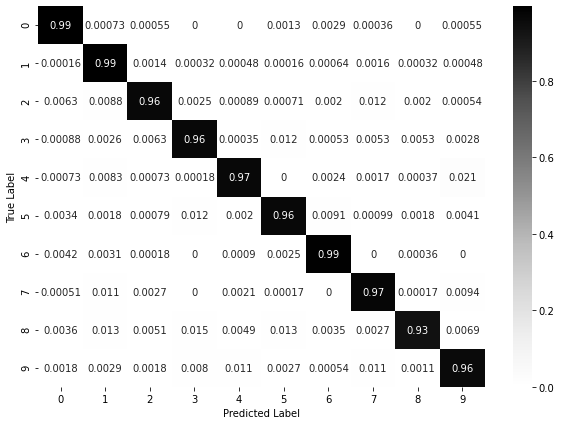

In [26]:
set_digits = { 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 }

df_cm = pd.DataFrame(cm, index=set_digits, columns=set_digits)
plt.figure(figsize = (10,7))
sn_plot = sn.heatmap(df_cm, annot=True, cmap="Greys")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [30]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_train, y_train_pred, normalize=True)*100
print(f"Pipeline: knn ({accuracy:.4f}%)")
print(classification_report(y_train, y_train_pred))

Pipeline: knn (97.0375%)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5499
           1       0.96      0.99      0.97      6287
           2       0.98      0.96      0.97      5595
           3       0.96      0.96      0.96      5679
           4       0.98      0.97      0.97      5450
           5       0.96      0.96      0.96      5068
           6       0.98      0.99      0.98      5542
           7       0.97      0.97      0.97      5846
           8       0.99      0.93      0.96      5504
           9       0.95      0.96      0.96      5530

    accuracy                           0.97     56000
   macro avg       0.97      0.97      0.97     56000
weighted avg       0.97      0.97      0.97     56000

